# Practical session: Exploratory Data Analysis (EDA) - Heart disease 

The main purpose of EDA is to help look at data before making any assumptions. It can help to:
- identify obvious errors,
- understand patterns,
- detect outliers or anomalous events, 
- find relations among the variables.

## Dataset

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

This dataset contains 14 columns that represent the following features:

- `age`: age
- `sex`: gender: 1 - male, 0 - female
- `cp`: type of chest pain (0 - typical angina; 1 - atypical angina; 2 - not angina; 3 - no symptoms
- `trestbps`: resting blood pressure
- `chol`: cholesterol
- `fbs`: fasting glucose level
- `restecg`: ECG (0 = normal, 1 = abnormal ST-T, 2 = according to the Estes standard, showing possible or definite hypertrophy of the left ventricle, severe condition)
- `thalach`: maximum heart rate
- `exang`: exercise-induced angina pectoris (1 - yes; 0 - no)
- `oldpeak`: ST segment suppression caused by exercise relative to rest
- `slope`: electro cardiogram of the heart at maximum load (1 = ascent, 2 = smooth, 3 = descent)
- `ca`: the number of major blood vessels with a fluorescent color (0-4). Fluorescent color is mainly associated with diabetes
- `thal`: a blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
- `target`: presence of heart disease in the patient (0 - no; 1 - yes)

In [2]:

## Importing Libraries 

# Base libraries
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Default options 
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Data loading

In [3]:
# Set the data path 
DATA_PATH="../data/heart/"
print(os.listdir(DATA_PATH))
# read the datafile
df = pd.read_csv(DATA_PATH + "heart.csv")

['heart.csv', 'README.md']


In [4]:
## Quick exploration
# Dataset dimensions
print("dataset:", df.shape[0],"rows,", df.shape[1], "columns")

dataset: 303 rows, 14 columns


In [5]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.40,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.30,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.00,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.60,2,0,2,1


## Data overview

Dataset dimensions

In [6]:
# Dimensions (shape)
print("positive: ", df[df.target == 1].shape)
print("negative: ", df[df.target == 0].shape)

positive:  (165, 14)
negative:  (138, 14)


### Variables

<img width="300" alt="image" src="https://sciencenotes.org/wp-content/uploads/2020/05/IndependentDependent-1024x683.png">

#### Independent Variable 

*aka:* `Feature, Independent, Input, Column, Predictor, Explanatory`

Other variables that are assumed to influence the dependent variable.

#### Dependent Variable

*aka:* `Target, Dependent, Output, Response`

#### Variables types

- `Numeric Variables`: temperature, age, square footage, price, etc.
- `Categorical Variables` (Nominal, Ordinal): gender (nominal), survival status (nominal), football teams (nominal), educational level (ordinal)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


**Categorical variables**

- `sex`: gender: 1 - male, 0 - female
- `cp`: type of chest pain (0 - typical angina; 1 - atypical angina; 2 - not angina; 3 - no symptoms
- `restecg`: ECG (0 = normal, 1 = abnormal ST-T, 2 = according to the Estes standard, showing possible or definite hypertrophy of the left ventricle, severe condition)
- `fbs`: fasting glucose level (0, 1)
- `exang`: exercise-induced angina pectoris (1 - yes; 0 - no)
- `slope`: electro cardiogram of the heart at maximum load (1 = ascent, 2 = smooth, 3 = descent)
- `ca`: the number of major blood vessels with a fluorescent color (0-4). Fluorescent color is mainly associated with diabetes
- `thal`: a blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)

- `target`: presence of heart disease in the patient (0 - no; 1 - yes)


In [8]:
## Set categorical variables 
categorical_features = ['sex', 'cp', 'restecg', 'fbs', 'exang', 'slope', 'ca', 'thal']
numeric_features = [feature for feature in df.columns if feature not in categorical_features and "target" not in feature]
#cols = [col for col in df.columns if "Outcome" not in col]
df[categorical_features] =  df[categorical_features].astype(object)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB
None


In [9]:
numeric_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [10]:
# Check for null values
print(df.isnull().any())

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


## Statistics  


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
trestbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
thalach,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20
target,303.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00


## Target variable

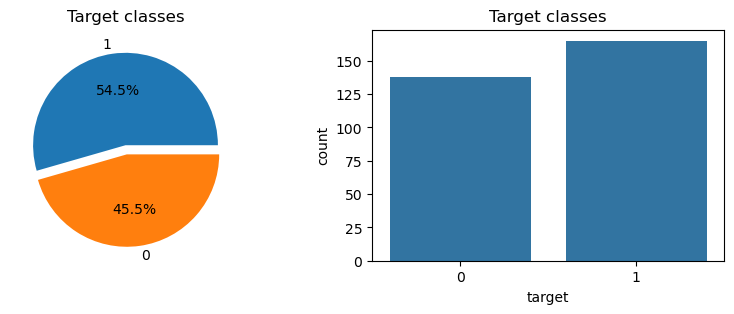

In [12]:
fig,axes = plt.subplots(1,2,figsize=(10,3))
df['target'].value_counts().plot.pie( autopct='%.1f%%', explode=[0,0.1], ax=axes[0] ).set_title('Target classes');
axes[0].set_title('Target classes')
axes[0].set_ylabel('')
sns.countplot(data = df ,x='target', ax=axes[1])
axes[1].set_title('Target classes')
plt.show()

## Feature analysis

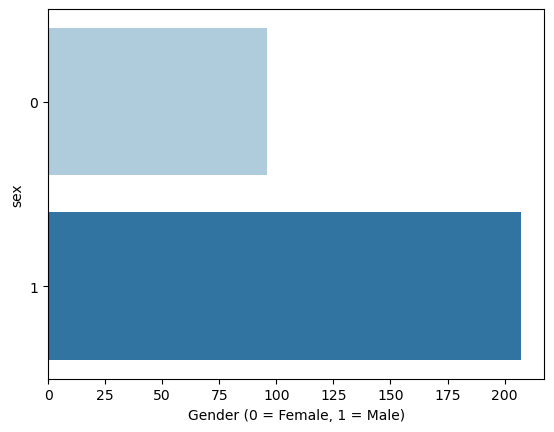

In [13]:
# Gender distribution
sns.countplot(y='sex', data=df, palette="Paired")
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.show()


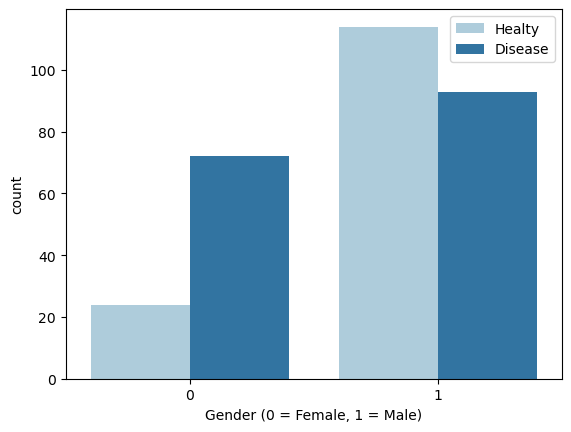

In [14]:
# Fequency 
sns.countplot(x="sex", hue="target", data=df, palette="Paired")
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.legend(["Healty", "Disease"])
plt.show()

In [15]:
# cp: type of chest pain (0 - typical angina; 1 - atypical angina; 2 - not angina; 3 - no symptoms
cp = ["Typical anguina", "Atypical angina", "Not angina", "no symptoms"]
sns.countplot(x="cp", hue="target", data=df, palette="Paired")
plt.xlabel('Chest Pain Type')
plt.xticks( np.unique(df.cp), cp, rotation=30)
plt.ylabel('Count')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 640x480 with 1 Axes>

In [16]:
# drop_first: Remove first level to get k-1 dummies out of k categorical levels.
#df = pd.get_dummies(df, columns=['cp'], drop_first=True)

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


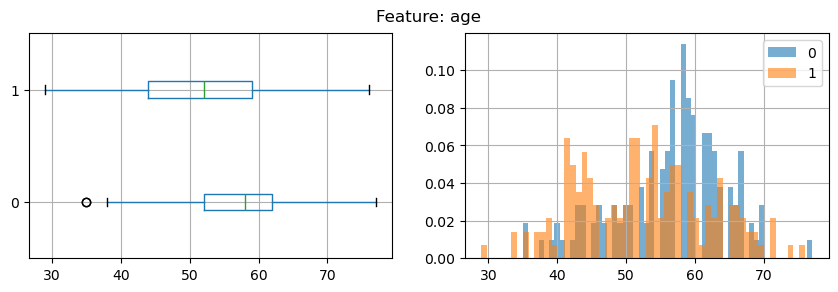

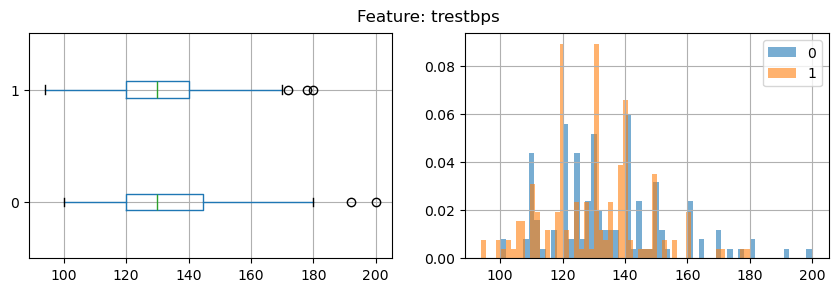

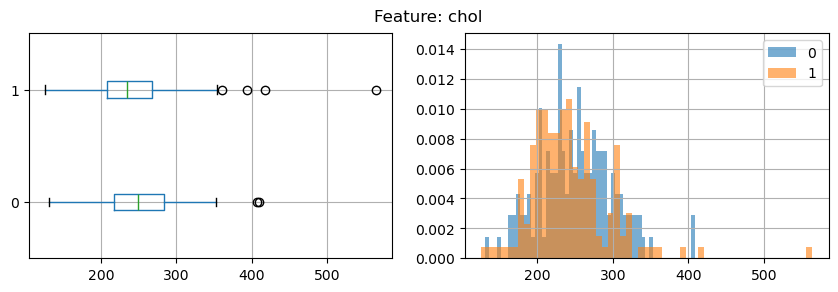

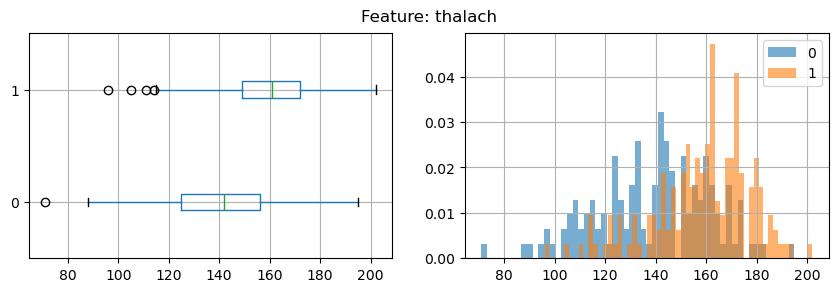

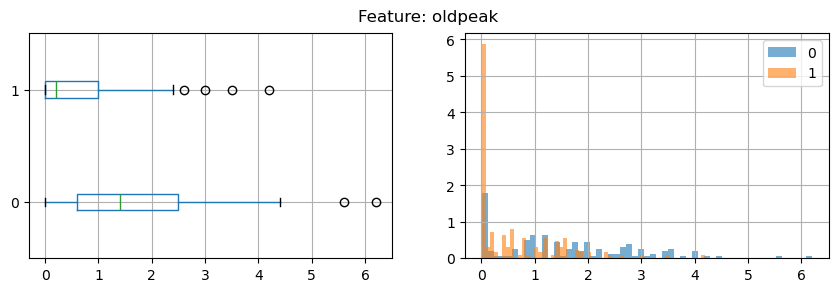

In [18]:
# Function to print histogram of numerical features 
def plot_feature(dataframe, col_name):
    """Plot the given feature by class (negative and positive)
    Args:
        dataframe (dataframe): data source as dataframe
        col_name (numeric): colunm name (feature)
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    dataframe.groupby('target')[col_name].hist(bins=55, alpha=.6, density=True, ax=axes[1])
    axes[1].legend(['0','1'])
    dataframe.boxplot(col_name, by="target", ax=axes[0], vert=False)
    axes[0].set_title("")
    axes[0].set_ylabel("")
    fig.suptitle('Feature: ' + col_name)
    plt.show()


for feature in numeric_features:
    plot_feature(df,feature)

## Correlation between features

- `POSITIVE CORRELATION`: If an increase in feature A leads to increase in feature B, then they are **positively correlated**. A value 1 means perfect positive correlation.
- `NEGATIVE CORRELATION`: If an increase in feature A leads to decrease in feature B, then they are **negatively correlated**. A value -1 means perfect negative correlation.

        Attention: Lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

*Note: Only numeric features*

<Axes: >

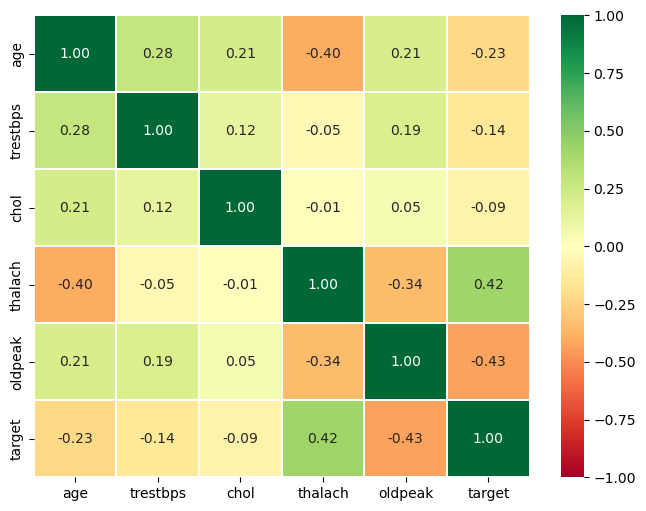

In [19]:
features = numeric_features.copy()
features.append("target")
plt.figure(figsize = (8,6))
sns.heatmap(data = df[features].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,
            vmin=-1, vmax=1, fmt=".2f")

In [20]:
numeric_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

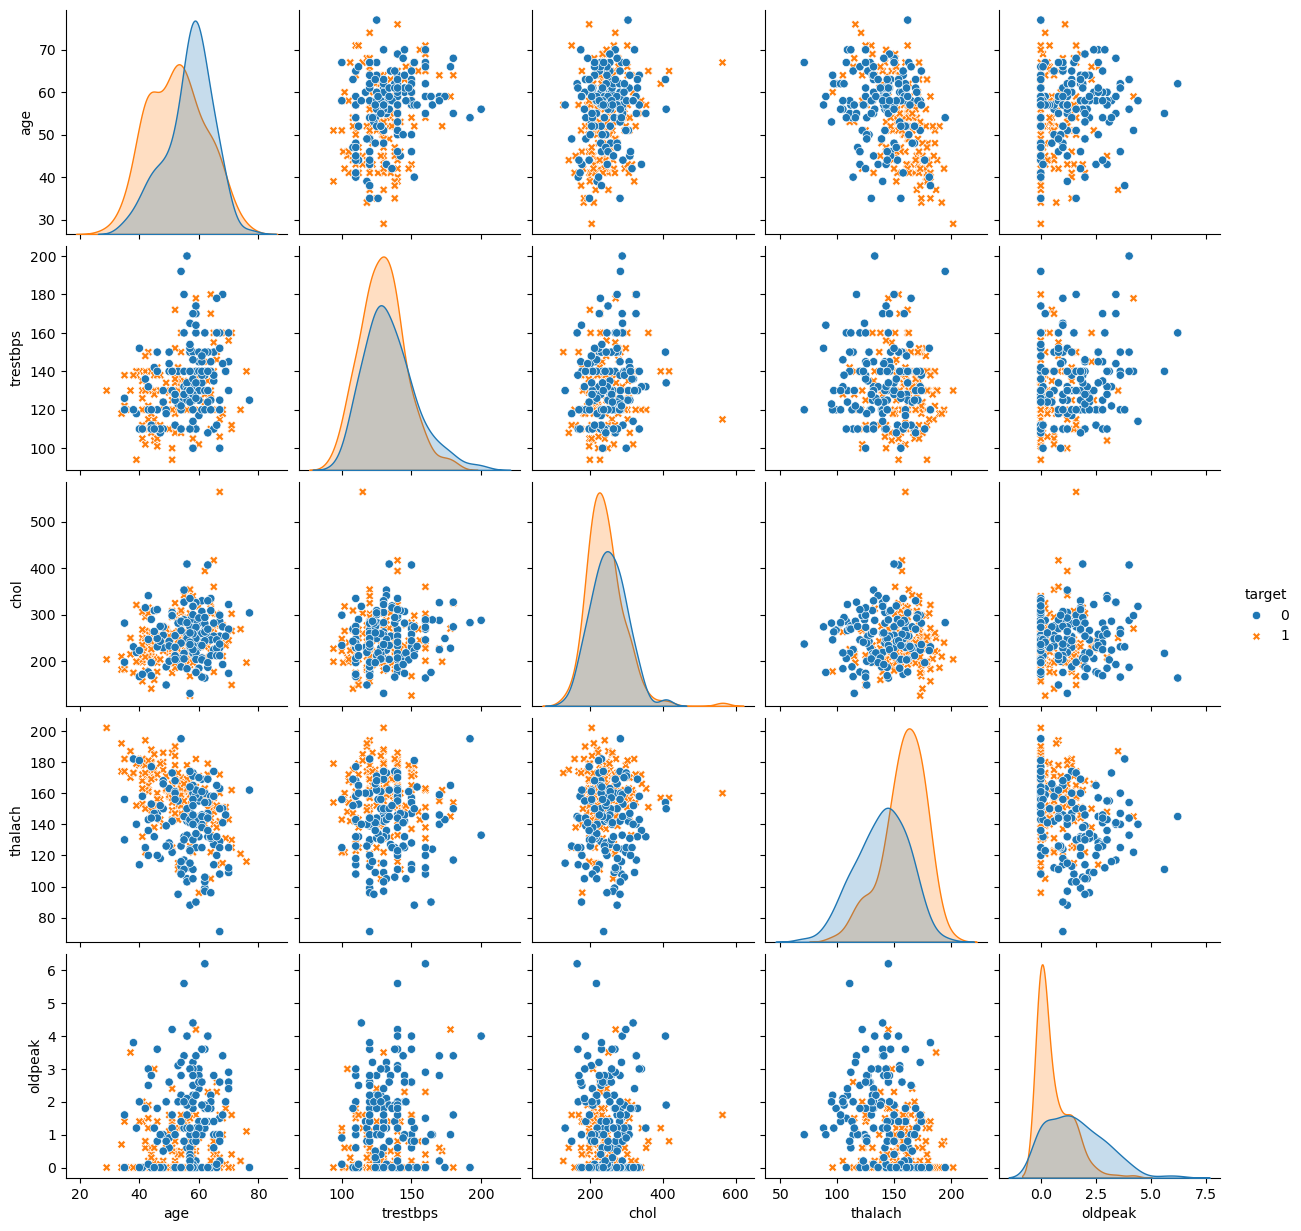

In [21]:

sns.pairplot(data=df[features],hue="target",markers=["o","X"])

## Outliers

An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal) objects.

<img width="300" alt="image" src="https://www.researchgate.net/publication/353410712/figure/fig1/AS:1048732418203648@1627048701501/Removal-of-outliers-using-IQR-method.png">

Inter-Quartile Range

```
IQR = Q3 - Q1
```

To detect the outliers using this method, we define a new range, let’s call it decision range, and any data point lying outside this range is considered as outlier and is accordingly dealt with. The range is as given below:

```
Lower Bound: (Q1 - 1.5 * IQR)
Upper Bound: (Q3 + 1.5 * IQR)
```
Any data point less than the Lower Bound or more than the Upper Bound is considered as an outlier.



In [22]:
numeric_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [23]:
def get_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    lower_bound  = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df_idx =  (df_in[col_name] < lower_bound) | (df_in[col_name] > upper_bound)
    return df_idx


outliers_ids=get_outliers(df, 'chol' )

df[outliers_ids]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.80,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.60,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.20,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.00,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.90,1,2,3,0


In [24]:
df_extended = df.copy()
df_extended["outlier"] = False
for feature in numeric_features:
    outliers_ids = get_outliers(df_extended, feature)
    df_extended.outlier[outliers_ids] = True

In [25]:
df_extended.loc[df_extended.outlier==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,outlier
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1,True
28,65,0,2,140,417,1,0,157,0,0.80,2,1,2,1,True
85,67,0,2,115,564,0,0,160,0,1.60,1,0,3,1,True
96,62,0,0,140,394,0,0,157,0,1.20,1,0,2,1,True
101,59,1,3,178,270,0,0,145,0,4.20,0,0,3,1,True
110,64,0,0,180,325,0,1,154,1,0.00,2,0,2,1,True
203,68,1,2,180,274,1,0,150,1,1.60,1,0,3,0,True
204,62,0,0,160,164,0,0,145,0,6.20,0,3,3,0,True
220,63,0,0,150,407,0,0,154,0,4.00,1,3,3,0,True
221,55,1,0,140,217,0,1,111,1,5.60,0,0,3,0,True
